In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gwatpy.mcmc_routines as gmcmc
from corner import corner
import h5py 

In [2]:
N = 100
time = np.linspace(0,N,N)
dn = 2/ (N-1)
sigma = 1
beta = 5

In [3]:
true_data = np.loadtxt("../data/full_data_transdimensional_5_5_1_100.csv")
true_clean_data = np.loadtxt("../data/clean_data_transdimensional_5_5_1_100.csv")

In [4]:
def cheb_fn(P,coeff,x ):
    return np.sum(coeff[:P] * np.cos(np.arange(P)*np.arccos(x)))

In [5]:
data = gmcmc.RJPTMCMC_unpack_file("../data/output_trans.hdf5")
#dim_fixed = [5,6,4,3]
data_fixed_1 = gmcmc.trim_thin_file("../data/output_trans_fixed_dim1.hdf5")
data_fixed_2 = gmcmc.trim_thin_file("../data/output_trans_fixed_dim2.hdf5")
data_fixed_3 = gmcmc.trim_thin_file("../data/output_trans_fixed_dim3.hdf5")
data_fixed_4 = gmcmc.trim_thin_file("../data/output_trans_fixed_dim4.hdf5")

f1 = h5py.File("../data/output_trans_fixed_dim1.hdf5")
f2 = h5py.File("../data/output_trans_fixed_dim2.hdf5")
f3 = h5py.File("../data/output_trans_fixed_dim3.hdf5")
f4 = h5py.File("../data/output_trans_fixed_dim4.hdf5")

evidence1 = f1["MCMC_METADATA"]["EVIDENCE"][0]
evidence2 = f2["MCMC_METADATA"]["EVIDENCE"][0]
evidence3 = f3["MCMC_METADATA"]["EVIDENCE"][0]
evidence4 = f4["MCMC_METADATA"]["EVIDENCE"][0]
print(evidence1,evidence2,evidence3,evidence4)

IL1 = f1["MCMC_METADATA"]["INTEGRATED LIKELIHOODS"][:]
IL2 = f2["MCMC_METADATA"]["INTEGRATED LIKELIHOODS"][:]
IL3 = f3["MCMC_METADATA"]["INTEGRATED LIKELIHOODS"][:]
IL4 = f4["MCMC_METADATA"]["INTEGRATED LIKELIHOODS"][:]
ILNUM1 = f1["MCMC_METADATA"]["INTEGRATED LIKELIHOODS TERM NUMBER"][:]
ILNUM2 = f2["MCMC_METADATA"]["INTEGRATED LIKELIHOODS TERM NUMBER"][:]
ILNUM3 = f3["MCMC_METADATA"]["INTEGRATED LIKELIHOODS TERM NUMBER"][:]
ILNUM4 = f4["MCMC_METADATA"]["INTEGRATED LIKELIHOODS TERM NUMBER"][:]
T1 = f1["MCMC_METADATA"]["CHAIN TEMPERATURES"][:]
T2 = f2["MCMC_METADATA"]["CHAIN TEMPERATURES"][:]
T3 = f3["MCMC_METADATA"]["CHAIN TEMPERATURES"][:]
T4 = f4["MCMC_METADATA"]["CHAIN TEMPERATURES"][:]

trim:  0
ac:  23.4
trim:  0
ac:  27.7
trim:  0
ac:  18.3
trim:  0
ac:  14.1
-154.58785803571726 -158.05036445214134 -154.48308571208824 -157.90231235909985


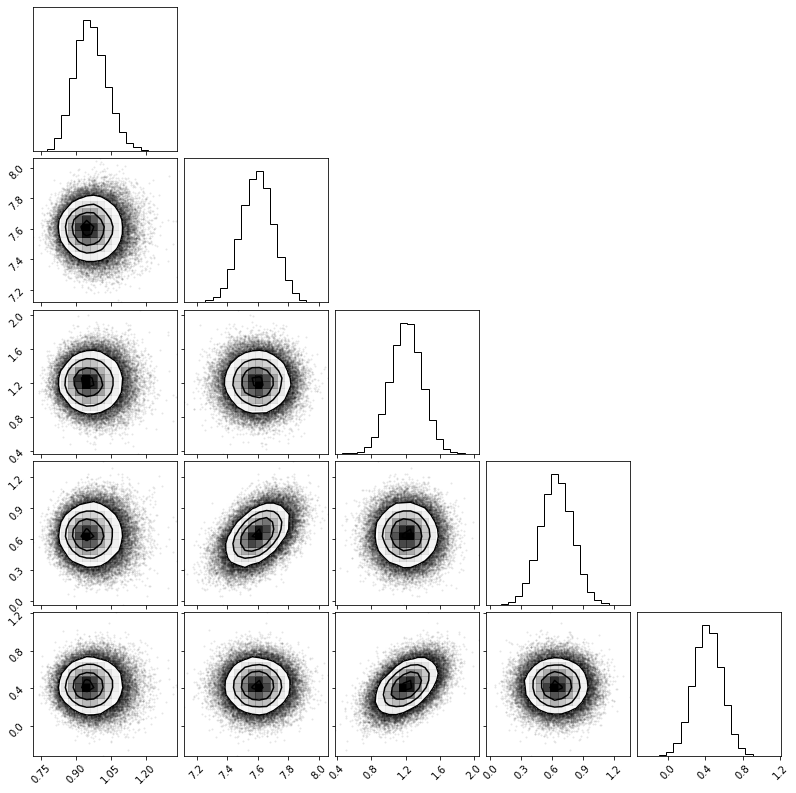

In [6]:
fig = corner(data_fixed_1)

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5]
Bayes factor 5/6 (RJ):  564.7047817047817
Bayes factor 5/6 (PTMCMC):  31.896823129801792
Bayes factor 5/4 (RJ):  0.0406113858344051
Bayes factor 5/4 (PTMCMC):  0.900529528542892
Bayes factor 5/3 (RJ):  0.08939492723454406
Bayes factor 5/3 (PTMCMC):  27.507379754545642
Bayes factor 4/3 (RJ):  2.2012281875594257
Bayes factor 4/3 (PTMCMC):  30.545783211633434
1.5901445565554135e-67


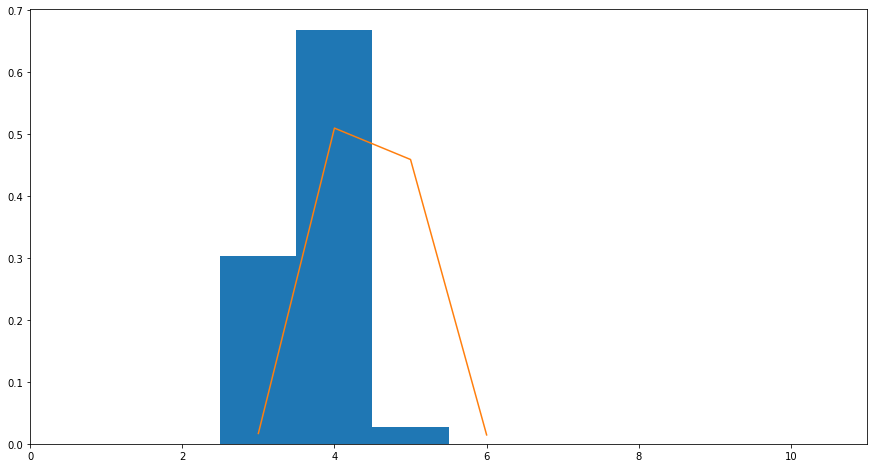

In [18]:
bins = np.linspace(0.5,len(data[1][0])+.5,len(data[1][0])+1)
mids = bins[1:] - .5
print(bins)
dims = np.sum(data[1],axis=1)
print("Bayes factor 5/6 (RJ): ",np.sum(dims == 5) / np.sum(dims==6))
print("Bayes factor 5/6 (PTMCMC): ",np.exp(evidence1 - evidence2))
print("Bayes factor 5/4 (RJ): ",np.sum(dims == 5) / np.sum(dims==4))
print("Bayes factor 5/4 (PTMCMC): ",np.exp(evidence1 - evidence3))
print("Bayes factor 5/3 (RJ): ",np.sum(dims == 5) / np.sum(dims==3))
print("Bayes factor 5/3 (PTMCMC): ",np.exp(evidence1 - evidence4))
print("Bayes factor 4/3 (RJ): ",np.sum(dims == 4) / np.sum(dims==3))
print("Bayes factor 4/3 (PTMCMC): ",np.exp(evidence3 -evidence4))

fig, ax = plt.subplots(figsize=[15,8])
ax.hist(dims,bins=bins,log=False,density=True)
total = np.sum(np.exp([evidence4,evidence3,evidence1,evidence2]))
print(total)
ax.plot(mids[2:6],np.exp([evidence4,evidence3,evidence1,evidence2])/total)


In [19]:
recon = [[cheb_fn(np.sum(data[1][x,1:]), data[0][x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]
recon_fixed1 = [[cheb_fn(len(data_fixed_1[x,1:]), data_fixed_1[x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]
recon_fixed2 = [[cheb_fn(len(data_fixed_2[x,1:]), data_fixed_2[x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]
recon_fixed3 = [[cheb_fn(len(data_fixed_3[x,1:]), data_fixed_3[x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]
recon_fixed4 = [[cheb_fn(len(data_fixed_4[x,1:]), data_fixed_4[x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]


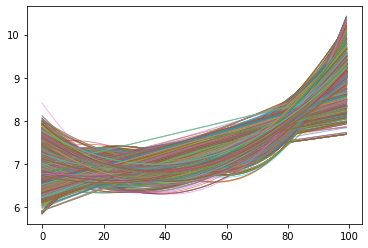

In [20]:
for x in recon:
    plt.plot(x,alpha=.5,linewidth=1)

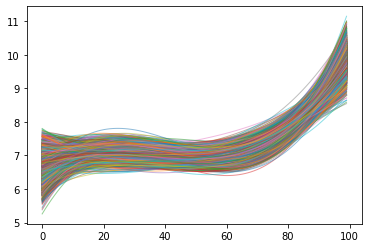

In [21]:
for x in recon_fixed1:
    plt.plot(x,alpha=.5,linewidth=1)

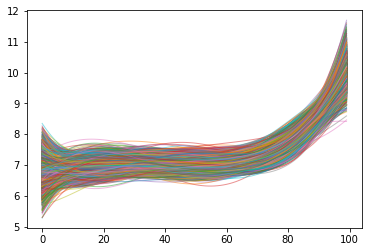

In [22]:
for x in recon_fixed2:
    plt.plot(x,alpha=.5,linewidth=1)

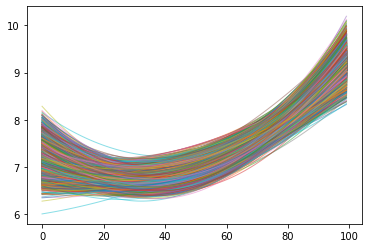

In [23]:
for x in recon_fixed3:
    plt.plot(x,alpha=.5,linewidth=1)

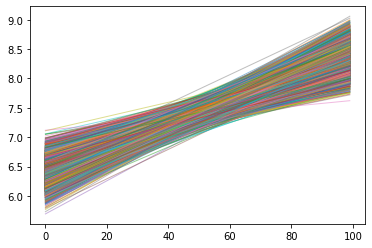

In [24]:
for x in recon_fixed4:
    plt.plot(x,alpha=.5,linewidth=1)

In [25]:
up = np.quantile(recon,.9,axis=0)
down = np.quantile(recon,.1,axis=0)
up_fixed1 = np.quantile(recon_fixed1,.9,axis=0)
down_fixed1 = np.quantile(recon_fixed1,.1,axis=0)
up_fixed2 = np.quantile(recon_fixed2,.9,axis=0)
down_fixed2 = np.quantile(recon_fixed2,.1,axis=0)
up_fixed3 = np.quantile(recon_fixed3,.9,axis=0)
down_fixed3 = np.quantile(recon_fixed3,.1,axis=0)
up_fixed4 = np.quantile(recon_fixed4,.9,axis=0)
down_fixed4 = np.quantile(recon_fixed4,.1,axis=0)

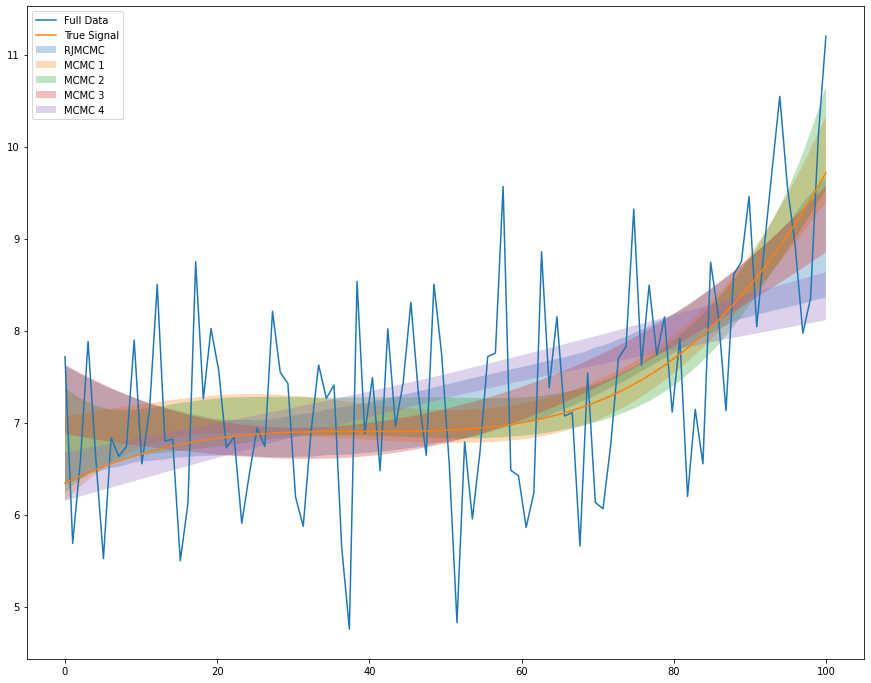

In [27]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[15,12])
ax.plot(time,true_data,label='Full Data')
ax.plot(time,true_clean_data,label="True Signal")
ax.fill_between(time,up,down,alpha=.3,label='RJMCMC')
ax.fill_between(time,up_fixed1,down_fixed1,alpha=.3,label='MCMC 1')
ax.fill_between(time,up_fixed2,down_fixed2,alpha=.3,label='MCMC 2')
ax.fill_between(time,up_fixed3,down_fixed3,alpha=.3,label='MCMC 3')
ax.fill_between(time,up_fixed4,down_fixed4,alpha=.3,label='MCMC 4')

ax.legend()

(array([2.0000e+01, 5.3400e+02, 4.4720e+03, 2.6252e+04, 7.7943e+04,
        9.8803e+04, 5.2658e+04, 1.3661e+04, 1.6240e+03, 1.2300e+02]),
 array([-0.33505013, -0.19079955, -0.04654897,  0.09770162,  0.2419522 ,
         0.38620278,  0.53045336,  0.67470394,  0.81895452,  0.9632051 ,
         1.10745568]),
 <BarContainer object of 10 artists>)

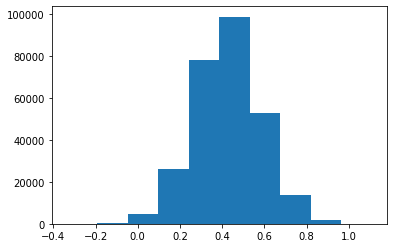

In [39]:
ID = 4
plt.hist(data[0][data[1][:,ID] == 1,ID])

In [17]:
dims = np.sum(data[1],axis=1)

In [30]:
from scipy.integrate import trapz,quad
from scipy.interpolate import interp1d
Ts= [T1,T2,T3,T4]
LLs = [IL1,IL2,IL3,IL4]
lnE = []
for ct in np.arange(len([IL1,IL2,IL3,IL4])):
    
    betas = np.flip(1/Ts[ct][:len(LLs[ct])])
    LL = np.flip(LLs[ct][:])
    func1 = interp1d(betas,LL,kind='cubic')
    evidence = quad(func1, betas[0],betas[-1])[0]
    evidencetrapz = trapz(LL,x=betas)
    print(evidencetrapz)
    lnE.append(evidence)
print(lnE)
print(evidence1,evidence2,evidence3,evidence4)

-155.53177684101126
-159.16765531311916
-155.23909940034082
-158.49580858622178
[-154.94055818126833, -158.33158299624455, -154.68131343049873, -158.23240807823004]
-154.58785803571726 -158.05036445214134 -154.48308571208824 -157.90231235909985


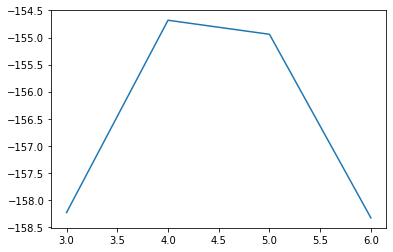

In [31]:
plt.plot(mids[2:6],[lnE[3],lnE[2],lnE[0],lnE[1]])

In [32]:
print("Bayes factor 5/6 (RJ): ",np.sum(dims == 5) / np.sum(dims==6))
print("Bayes factor 5/6 (PTMCMC): ",np.exp(lnE[0] - lnE[1]))
print("Bayes factor 5/4 (RJ): ",np.sum(dims == 5) / np.sum(dims==4))
print("Bayes factor 5/4 (PTMCMC): ",np.exp(lnE[0] - lnE[2]))
print("Bayes factor 5/3 (RJ): ",np.sum(dims == 5) / np.sum(dims==3))
print("Bayes factor 5/3 (PTMCMC): ",np.exp(lnE[0] - lnE[3]))
print("Bayes factor 4/3 (RJ): ",np.sum(dims == 4) / np.sum(dims==3))
print("Bayes factor 4/3 (PTMCMC): ",np.exp(lnE[2] -lnE[3]))

Bayes factor 5/6 (RJ):  564.7047817047817
Bayes factor 5/6 (PTMCMC):  29.696369966132252
Bayes factor 5/4 (RJ):  0.0406113858344051
Bayes factor 5/4 (PTMCMC):  0.7716341418801692
Bayes factor 5/3 (RJ):  0.08939492723454406
Bayes factor 5/3 (PTMCMC):  26.89256614588777
Bayes factor 4/3 (RJ):  2.2012281875594257
Bayes factor 4/3 (PTMCMC):  34.851446671814124


[1.         0.52407738 0.28827925 0.16975456 0.10839157 0.07375209
 0.05323304 0.03499426 0.01319908 0.001     ]
[-137.72707533 -140.29987863 -144.96051085 -153.24040032 -168.42917512
 -200.04080248 -248.1523618  -297.7698024  -347.39890958 -506.67894784]


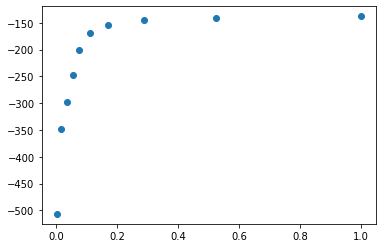

In [33]:
plt.scatter(1/T1[:len(IL1[:])],IL1[:])
print(1/T1[:len(IL1[:])])
print(IL1)
#plt.plot(IL2[:-1])
#plt.plot(IL3[:-1])
#plt.plot(IL4[:-1])

In [34]:
print(ILNUM1)
print(ILNUM2)
print(ILNUM3)
print(ILNUM4)
print(T1)

[1599920 1600000 1600000 1600000 1600000 1600000 1600000 1600000 1600000
 1600000]
[1799910 1800000 1800000 1800000 1800000 1800000 1800000 1800000 1800000
 1800000]
[1199940 1200000 1200000 1200000 1200000 1200000 1200000 1200000 1200000
 1200000]
[1799910 1800000 1800000 1800000 1800000 1800000 1800000 1800000 1800000
 1800000]
[   1.            1.90811516    3.46885879    5.89085807    9.22580951
   13.5589371    18.78532603   28.5761179    75.76283997 1000.
    1.            1.90811516    3.46885879    5.89085807    9.22580951
   13.5589371    18.78532603   28.5761179    75.76283997 1000.
    1.            1.90811516    3.46885879    5.89085807    9.22580951
   13.5589371    18.78532603   28.5761179    75.76283997 1000.
    1.            1.90811516    3.46885879    5.89085807    9.22580951
   13.5589371    18.78532603   28.5761179    75.76283997 1000.
    1.            1.90811516    3.46885879    5.89085807    9.22580951
   13.5589371    18.78532603   28.5761179    75.76283997 1000

0
10
20
30
40
50
60
70
80
90
-137.72707532746116


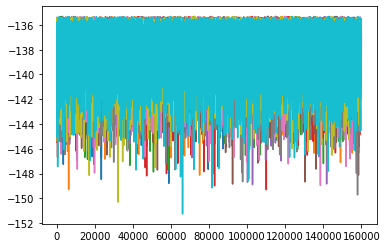

In [36]:
f1 = h5py.File("../data/output_trans_fixed_dim1.hdf5",'r')
LLLP1 = f1["MCMC_OUTPUT"]["LOGL_LOGP"]
num =0
ave = 0
ensemble_member = 9
ensemble_size = 10
for c in LLLP1.keys():
    chain = int(c[5:])
    #if chain%ensemble_size == ensemble_member:
    if True:
        print(chain)
        ave+= np.sum(LLLP1[c][:,0])
        num+=len(LLLP1[c][:,0])
        plt.plot(LLLP1[c][:,0])
print(ave/num)